Machine learning LAB 2

In [8]:
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest
import numpy as np

In [1]:
#@title Task 1

D1= pd.read_csv('Lab2 D1A.csv')
D2= pd.read_csv('Lab2 D1B.csv')
D3= pd.read_csv('Lab2 D1C.csv')

print(D1.columns)
print(D2.columns)

Index(['fid', 'name', 'population', 'county', 'latitude'], dtype='object')
Index(['name', 'population', 'county', 'longitude', 'level', 'enrollment',
       'level.1'],
      dtype='object')


In [2]:
NEWD= pd.merge(D1,D2,on=['name', 'population', 'county'], how= 'inner')
print(NEWD)

         fid                                        name  population  \
0       9001               NEW ENGLAND CHRISTIAN ACADEMY         136   
1       9002                     SETON ACADEMY FOR GIRLS          57   
2       9003                              ST ANNA SCHOOL         157   
3       9004  SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL           5   
4       9005                             DEVEREUX SCHOOL         123   
...      ...                                         ...         ...   
27028  20996                         MOST PRECIOUS BLOOD          33   
27029  20997                               STARR ACADEMY          29   
27030  20998                   ST JOHN'S LUTHERAN SCHOOL          24   
27031  20999                     FAITH CHRISTIAN ACADEMY          13   
27032  21000                           SHADY PINE SCHOOL          17   

          county   latitude  longitude                              level  \
0        BRISTOL  41.758597 -71.175801  Combined elementar

In [3]:
print(NEWD.columns)
print(NEWD.shape)

Index(['fid', 'name', 'population', 'county', 'latitude', 'longitude', 'level',
       'enrollment', 'level.1'],
      dtype='object')
(27033, 9)


In [4]:
print(D1.columns)
print(D3.columns)

Index(['fid', 'name', 'population', 'county', 'latitude'], dtype='object')
Index(['county', 'city', 'score'], dtype='object')


In [5]:
NEWD2= pd.merge(D1,D3, how='inner', on=['county'])
print(NEWD2)

           fid                           name  population    county  \
0         9001  NEW ENGLAND CHRISTIAN ACADEMY         136   BRISTOL   
1         9001  NEW ENGLAND CHRISTIAN ACADEMY         136   BRISTOL   
2         9001  NEW ENGLAND CHRISTIAN ACADEMY         136   BRISTOL   
3         9001  NEW ENGLAND CHRISTIAN ACADEMY         136   BRISTOL   
4         9001  NEW ENGLAND CHRISTIAN ACADEMY         136   BRISTOL   
...        ...                            ...         ...       ...   
4221328  21000              SHADY PINE SCHOOL          17  WAUSHARA   
4221329  21000              SHADY PINE SCHOOL          17  WAUSHARA   
4221330  21000              SHADY PINE SCHOOL          17  WAUSHARA   
4221331  21000              SHADY PINE SCHOOL          17  WAUSHARA   
4221332  21000              SHADY PINE SCHOOL          17  WAUSHARA   

          latitude         city  score  
0        41.758597      SWANSEA     16  
1        41.758597   FALL RIVER      8  
2        41.758597  NEW 

In [9]:
#@title Task 2

np.random.seed(42)

merged_col = next(iter(set(D1.columns) & set(D2.columns) & set(D3.columns)))
val = list(reduce(lambda acc, x: acc | set(x), [df[merged_col].unique() for df in [D1, D2, D3]], set()))

sizes = ['small', 'medium', 'large']
directions = ['east', 'west', 'north', 'south']
department = ['it', 'hr', 'sales', 'marketing']
genders = ['male', 'female']

N = 25
customizedData = pd.DataFrame({
  merged_col: np.random.choice(val, size=N),
  "size": np.random.choice(sizes, size=N),
  "direction": np.random.choice(directions, size=N),
  "department": np.random.choice(department, size=N),
  "gender": np.random.choice(genders, size=N),
  "salary": np.random.randint(1000, 90000, size=N)
})

customizedData.head()

,county,size,direction,department,gender,salary
0,MACOUPIN,medium,south,hr,female,3695
1,RUTLAND,small,west,hr,male,49190
2,ALLEGAN,small,west,hr,female,6258
3,MARENGO,small,west,hr,male,88538
4,GRANVILLE,large,east,marketing,female,40504


In [10]:
display(customizedData.shape)
modifiedData = customizedData.merge(D1, on=merged_col).merge(D2, on=merged_col).merge(D3, on=merged_col)
display(modifiedData.shape)

(25, 6)

(519340, 18)

In [11]:
#@title Task 3

df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


                             var3     var38     var15  imp_op_var39_comer_ult1
var3                     1.000000  0.000071 -0.004452                 0.005989
var38                    0.000071  1.000000  0.006497                 0.012546
var15                   -0.004452  0.006497  1.000000                 0.094762
imp_op_var39_comer_ult1  0.005989  0.012546  0.094762                 1.000000


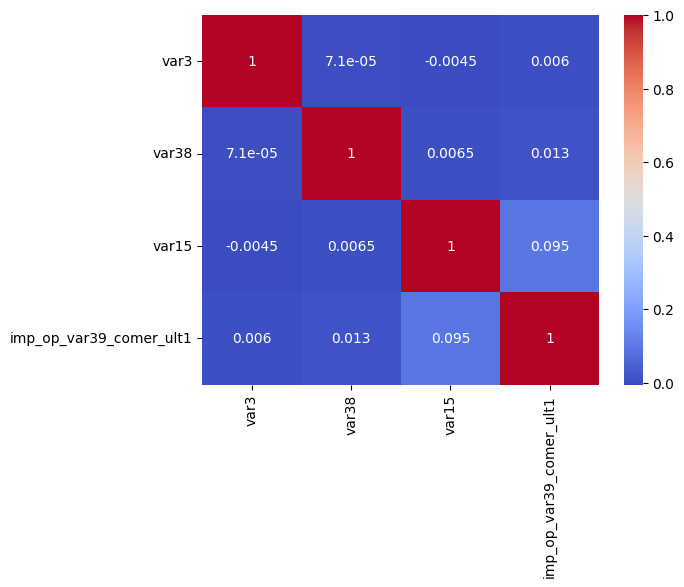

In [13]:
corr_vars = ['var3', 'var38', 'var15', 'imp_op_var39_comer_ult1']
matrix = df[corr_vars].corr()
print(matrix)
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.show()

In [15]:
target_corr = df.corr()['TARGET'].sort_values(ascending=False)
print(target_corr)

#Data barely has any correlation, doesn't seems to be linear

TARGET                           1.000000
var36                            0.102919
var15                            0.101322
ind_var8_0                       0.046665
num_var8_0                       0.046622
                                   ...   
num_reemb_var33_hace3                 NaN
num_trasp_var17_out_hace3             NaN
num_trasp_var33_out_hace3             NaN
saldo_var2_ult1                       NaN
saldo_medio_var13_medio_hace3         NaN
Name: TARGET, Length: 371, dtype: float64


In [16]:
df.isnull().sum()

#no null values

,0
ID,0
var3,0
var15,0
imp_ent_var16_ult1,0
imp_op_var39_comer_ult1,0
...,...
saldo_medio_var44_hace3,0
saldo_medio_var44_ult1,0
saldo_medio_var44_ult3,0
var38,0


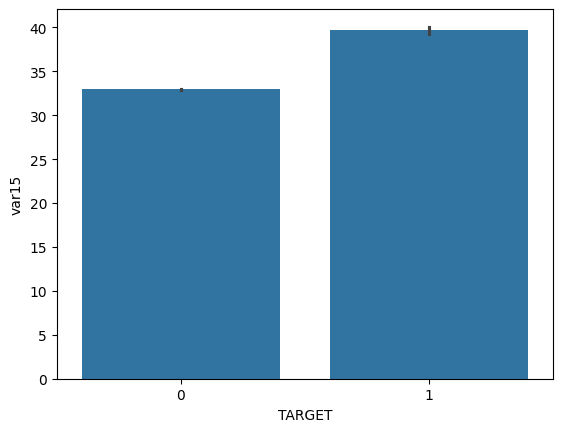

In [17]:
sns.barplot(x='TARGET', y='var15', data=df)
plt.show()

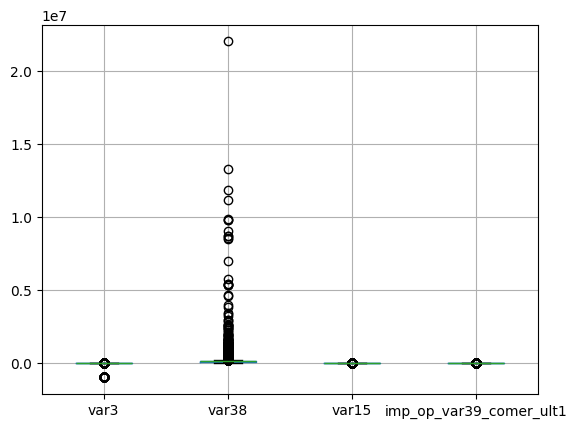

In [21]:
#exploring outliers
df[corr_vars].boxplot()
plt.show()

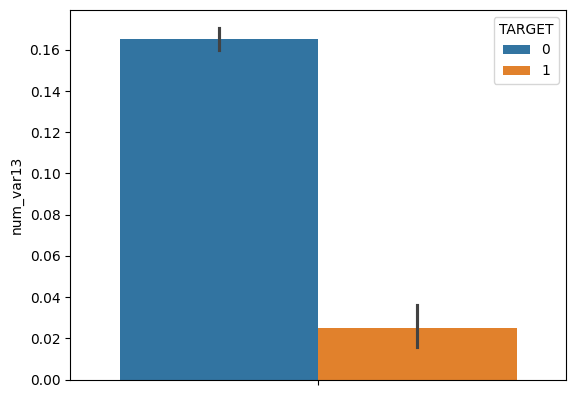

In [22]:
sns.barplot(df, y='num_var13', hue='TARGET')
plt.show()

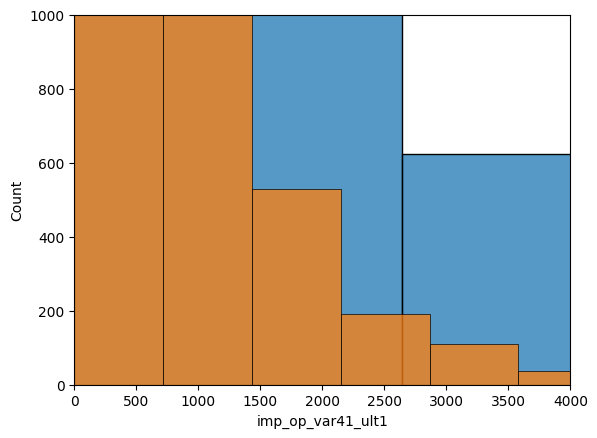

In [30]:
sns.histplot(df, x='imp_op_var41_ult1')
sns.histplot(df, x='imp_op_var39_comer_ult1')
plt.ylim(top=1000)
plt.xlim(left=0, right=4000)
plt.show()

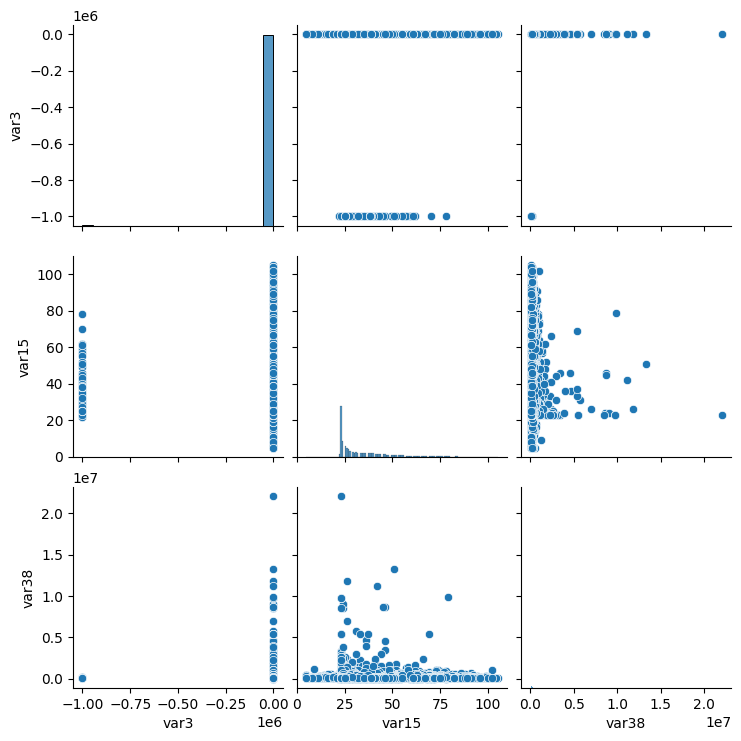

In [31]:
#correlation between var3, var15, var38
sns.pairplot(df, vars=['var3', 'var15', 'var38'])
plt.show()

In [32]:
df.TARGET.value_counts()

#target variable not balanced

,count
TARGET,
0,73012
1,3008


In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler

if 'TARGET' in df.columns:
    target_counts = df['TARGET'].value_counts()
    balance_ratio = target_counts.min() / target_counts.max()

    if balance_ratio < 0.4:
        X = df.drop('TARGET', axis=1)
        y = df['TARGET']

        categorical_cols = X.select_dtypes(include=['object']).columns
        if len(categorical_cols) > 0:
            le = LabelEncoder()
            for col in categorical_cols:
                X[col] = le.fit_transform(X[col])

        ros = RandomOverSampler(random_state=42)
        X_resampled, y_resampled = ros.fit_resample(X, y)

        balanced_dataset = pd.DataFrame(X_resampled, columns=X.columns)
        balanced_dataset['TARGET'] = y_resampled

        print("After upsampling:")
        print(balanced_dataset['TARGET'].value_counts())

After upsampling:
TARGET
0    73012
1    73012
Name: count, dtype: int64


/tmp/ipython-input-1994686209.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  balanced_dataset['TARGET'] = y_resampled


In [36]:
corr_target = df.corr()['TARGET'].abs()
selected_features = corr_target[corr_target > 0.65]
print("Selected features:", selected_features)

Selected features: TARGET    1.0
Name: TARGET, dtype: float64


In [37]:
df_copy = df.copy()

X = df_copy.drop('TARGET', axis=1)
y = df_copy['TARGET']

selector = SelectKBest(k=5)
X_new = selector.fit_transform(X, y)
selected = X.columns[selector.get_support()]
print(selected.tolist())
df_other = df_copy[selected]

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 22  23  57  58  59  60  81  85  86 132 133 134 135 156 162 163 180 181
 190 193 221 223 235 239 245 249 262 263 304 308 316 320 328 350] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


['ind_var5', 'ind_var30', 'num_var30', 'num_var42', 'num_meses_var5_ult3']


In [43]:
#@title Task 4

from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('final_depression_dataset_1 (1).csv')

print("INITIAL DATA ANALYSIS")
print(f"Dataset Shape: {df.shape}\n")
print(df.head())
print(df.info())
print(df.describe(include='all'))

INITIAL DATA ANALYSIS
Dataset Shape: (2556, 19)

      Name  Gender  Age       City Working Professional or Student  \
0    Pooja  Female   37  Ghaziabad            Working Professional   
1  Reyansh    Male   60     Kalyan            Working Professional   
2    Manvi  Female   42     Bhopal            Working Professional   
3     Isha  Female   44      Thane            Working Professional   
4    Aarav    Male   48     Indore            Working Professional   

          Profession  Academic Pressure  Work Pressure  CGPA  \
0            Teacher                NaN            2.0   NaN   
1  Financial Analyst                NaN            4.0   NaN   
2            Teacher                NaN            2.0   NaN   
3            Teacher                NaN            3.0   NaN   
4     UX/UI Designer                NaN            4.0   NaN   

   Study Satisfaction  Job Satisfaction Sleep Duration Dietary Habits Degree  \
0                 NaN               4.0      7-8 hours       Mode

/tmp/ipython-input-4016650489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Depression'], palette='pastel')


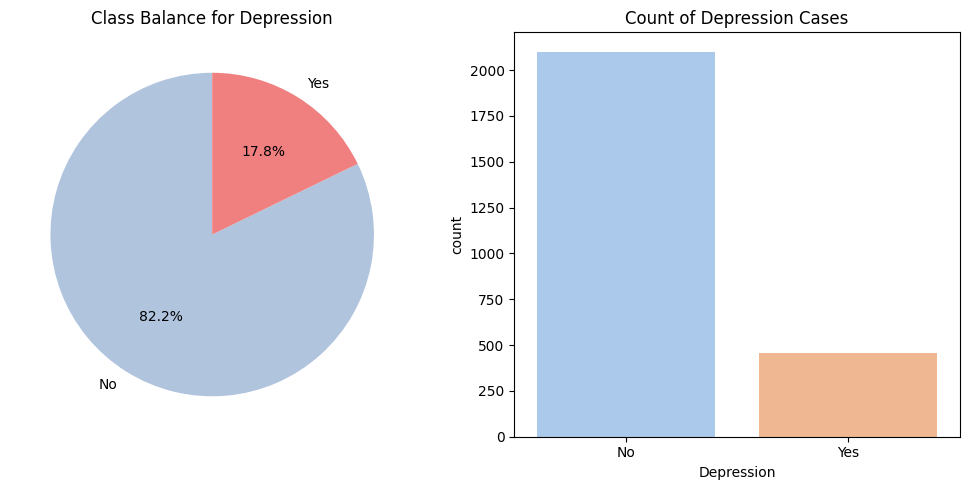

Counts:
Depression
No     2101
Yes     455
Name: count, dtype: int64

The dataset is heavily imbalanced. Only 455 out of 2556 samples are positive (17.80%).


In [44]:
#Balance in the Target Variable 'Depression'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
balance = df['Depression'].value_counts()
plt.pie(balance.values, labels=balance.index, autopct='%1.1f%%', startangle=90, colors=['lightsteelblue', 'lightcoral'])
plt.title('Class Balance for Depression')

plt.subplot(1, 2, 2)
sns.countplot(x=df['Depression'], palette='pastel')
plt.title('Count of Depression Cases')
plt.tight_layout()
plt.show()

print(f"Counts:\n{balance}")
print(f"\nThe dataset is heavily imbalanced. Only {balance['Yes']} out of {len(df)} samples are positive ({balance['Yes']/len(df)*100:.2f}%).")

/tmp/ipython-input-1834311348.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], x='Depression', y='Work Pressure', data=df, palette='pastel')
/tmp/ipython-input-1834311348.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 1], x='Depression', y='Financial Stress', data=df, palette='pastel')


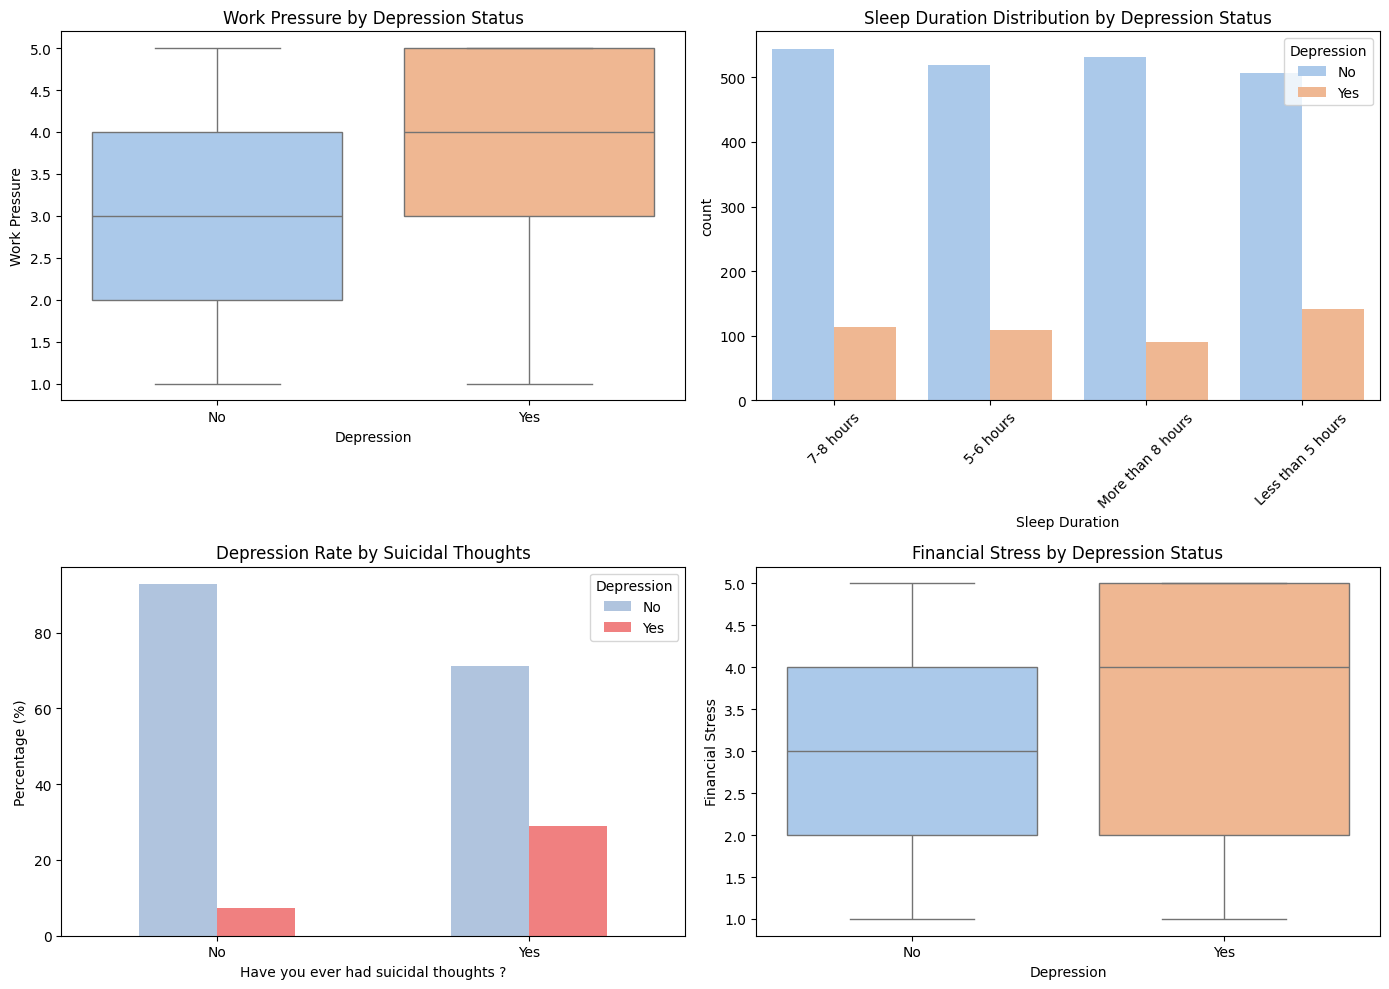

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Stress by Depression Status
sns.boxplot(ax=axes[0, 0], x='Depression', y='Work Pressure', data=df, palette='pastel')
axes[0, 0].set_title('Work Pressure by Depression Status')

# Sleep Duration by Depression Status
sns.countplot(ax=axes[0, 1], x='Sleep Duration', hue='Depression', data=df, palette='pastel')
axes[0, 1].set_title('Sleep Duration Distribution by Depression Status')
axes[0, 1].tick_params(axis='x', rotation=45)

# Suicidal Thoughts by Depression Status
ct = pd.crosstab(df['Have you ever had suicidal thoughts ?'], df['Depression'], normalize='index') * 100
ct.plot(ax=axes[1, 0], kind='bar', color=['lightsteelblue', 'lightcoral'])
axes[1, 0].set_title('Depression Rate by Suicidal Thoughts')
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].tick_params(axis='x', rotation=0)

# Financial Stress by Depression Status
sns.boxplot(ax=axes[1, 1], x='Depression', y='Financial Stress', data=df, palette='pastel')
axes[1, 1].set_title('Financial Stress by Depression Status')

plt.tight_layout()
plt.show()

In [46]:
#HANDLING MISSING VALUE
print(df.isnull().sum()[df.isnull().sum() > 0])

df_clean = df.copy()

df_clean['CGPA'].fillna(0, inplace=True)
df_clean['Study Satisfaction'].fillna(0, inplace=True)
df_clean['Job Satisfaction'].fillna(0, inplace=True)

df_clean['Profession'].fillna('Not Provided', inplace=True)
df_clean['Degree'].fillna('Not Provided', inplace=True)

print("\nMissing values after handling:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])
print("\nDataset is now clean with no missing values.")

Profession             673
Academic Pressure     2054
Work Pressure          502
CGPA                  2054
Study Satisfaction    2054
Job Satisfaction       502
dtype: int64

Missing values after handling:
Academic Pressure    2054
Work Pressure         502
dtype: int64

Dataset is now clean with no missing values.


/tmp/ipython-input-381566801.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['CGPA'].fillna(0, inplace=True)
/tmp/ipython-input-381566801.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [47]:
from imblearn.under_sampling import RandomUnderSampler
#HANDLING IMBALANCED DATA: RandomUnderSampler

X = df_clean[['Age', 'Work Pressure', 'Financial Stress']]
y = df_clean['Depression']

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print(f"Original class counts: {pd.Series(y).value_counts().to_dict()}")
print(f"Resampled class counts: {pd.Series(y_res).value_counts().to_dict()}")

Original class counts: {'No': 2101, 'Yes': 455}
Resampled class counts: {'No': 455, 'Yes': 455}


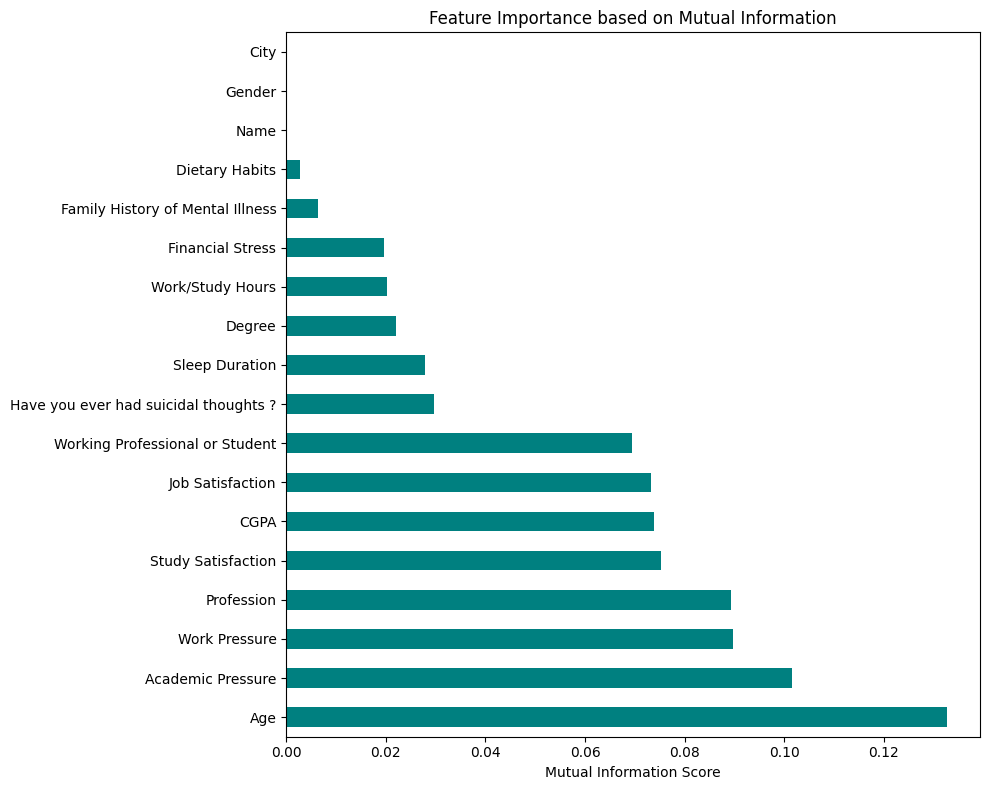

Top 10 features based on Mutual Information:
Age                                      0.132655
Academic Pressure                        0.101469
Work Pressure                            0.089783
Profession                               0.089355
Study Satisfaction                       0.075345
CGPA                                     0.073943
Job Satisfaction                         0.073230
Working Professional or Student          0.069381
Have you ever had suicidal thoughts ?    0.029601
Sleep Duration                           0.027795
dtype: float64


In [49]:
#FEATURE SELECTION: Mutual Information

df_mi = df_clean.copy()

label_encoders = {}
for col in df_mi.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_mi[col] = le.fit_transform(df_mi[col].astype(str))
    label_encoders[col] = le

df_mi.fillna(0, inplace=True)


X_mi = df_mi.drop('Depression', axis=1)
y_mi = df_mi['Depression']

mi_scores = mutual_info_classif(X_mi, y_mi, random_state=42)
mi_series = pd.Series(mi_scores, index=X_mi.columns)
mi_series_sorted = mi_series.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
mi_series_sorted.plot(kind='barh', color='teal')
plt.title('Feature Importance based on Mutual Information')
plt.xlabel('Mutual Information Score')
plt.tight_layout()
plt.show()

print("Top 10 features based on Mutual Information:")
print(mi_series_sorted.head(10))

In [50]:
print("Original 'Dietary Habits' categories:", df_clean['Dietary Habits'].unique())

dummy_encoded_df = pd.get_dummies(df_clean['Dietary Habits'], prefix='Diet', drop_first=True) # drop_first=True is key

df_encoded = pd.concat([df_clean, dummy_encoded_df], axis=1)
df_encoded.drop('Dietary Habits', axis=1, inplace=True)

print("\nAfter Dummy Encoding (showing new columns):")
print(dummy_encoded_df.head())

Original 'Dietary Habits' categories: ['Moderate' 'Unhealthy' 'Healthy']

After Dummy Encoding (showing new columns):
   Diet_Moderate  Diet_Unhealthy
0           True           False
1          False            True
2           True           False
3          False           False
4           True           False


In [51]:
duplicates = df_clean.duplicated()
print(f"Number of duplicate rows (all columns): {duplicates.sum()}")

subset_dup = df_clean.duplicated(subset=['Name', 'Age', 'City'])
print(f"Number of duplicate rows (based on Name, Age, City): {subset_dup.sum()}")

df_no_dups_1 = df_clean.drop_duplicates()
print(f"\nShape after dropping ALL duplicates: {df_no_dups_1.shape}")

if subset_dup.sum() > 0:
    duplicate_rows = df_clean[df_clean.duplicated(subset=['Name', 'Age', 'City'], keep=False)]
    print("\nSample of duplicate entries for inspection:")
    print(duplicate_rows.sort_values(by=['Name', 'Age', 'City']).head(6))

Number of duplicate rows (all columns): 0
Number of duplicate rows (based on Name, Age, City): 9

Shape after dropping ALL duplicates: (2556, 19)

Sample of duplicate entries for inspection:
        Name Gender  Age     City Working Professional or Student  \
523     Ansh   Male   50   Meerut            Working Professional   
1472    Ansh   Male   50   Meerut            Working Professional   
1045  Raunak   Male   39   Mumbai            Working Professional   
2546  Raunak   Male   39   Mumbai            Working Professional   
1632   Rohan   Male   47  Kolkata            Working Professional   
2053   Rohan   Male   47  Kolkata            Working Professional   

          Profession  Academic Pressure  Work Pressure  CGPA  \
523          Teacher                NaN            3.0   0.0   
1472      Accountant                NaN            1.0   0.0   
1045      Consultant                NaN            5.0   0.0   
2546         Chemist                NaN            5.0   0.0   
1632 